In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.pipeline import Pipeline


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D


import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
import os
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Contest/Titanic_data/train.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [74]:
features=['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked']
target=['Survived']

In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(0, inplace=True)

In [75]:
X_train,X_cv,y_train,y_cv=train_test_split(df[features],df[target],test_size=0.2,random_state=42)

In [76]:
model_2=XGBClassifier()
pipe_2=Pipeline([
    ('scaler',StandardScaler()),
    ('model',model_2)
])
pipe_2.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=None, n_jobs=None,
                 num_parallel_tree=None, random_state=None, ...))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'model': XGBClassifier(base_score=None, booster=None, callbac

In [79]:
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler,RobustScaler,StandardScaler,QuantileTransformer,Normalizer
param_grid_2={
    'scaler':[MaxAbsScaler(),MinMaxScaler(),RobustScaler(),StandardScaler()],
    'model__n_estimators':[50,100,200,300,400,500],
    'model__learning_rate':[0.01,0.05,0.1,0.2,0.3],
    'model__max_depth':[3,4,5,6,7],
}
grid_2=GridSearchCV(pipe_2,param_grid_2,cv=5,n_jobs=-1,verbose=1)
grid_2.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'model__max_depth': [3, 4, 5, 6, 7],
                         'model__n_estimators': [50, 100, 200, 300, 400, 500],
                         'scaler': [MaxAbsScaler(), MinMaxScaler(),
                                    RobustScaler(), StandardScaler()]},
             verbose=1)

In [78]:
grid_2.best_params_

{'model__learning_rate': 0.05,
 'model__max_depth': 3,
 'model__n_estimators': 200,
 'scaler': MaxAbsScaler()}

In [80]:
fit_params_2={
    'scaler':MaxAbsScaler(),
    'model__n_estimators':200,
    'model__learning_rate':0.05,
    'model__max_depth':3,
}
pipe_2.set_params(**fit_params_2)
pipe_2.fit(X_train,y_train)
pipe_2.score(X_cv,y_cv)

0.8268156424581006

In [81]:
pipe_2.score(X_train,y_train)

0.8820224719101124

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

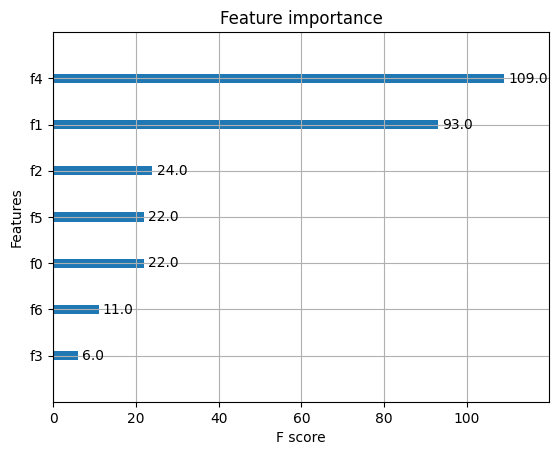

In [71]:
from xgboost import plot_importance
plot_importance(pipe_2.get_params()['model'])

In [73]:
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [36]:
pickle.dump(pipe_2,open('model.pkl','wb'))

In [45]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Contest/Titanic_data/test.csv')

In [46]:
PassengerId=df_test['PassengerId']

In [47]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [49]:
df_test['Sex']=df_test['Sex'].map({'male':0,'female':1})
df_test['Embarked']=df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [50]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [51]:
X_test=df_test[features]

In [54]:
ypred=pipe_2.predict(X_test)

In [55]:
output=pd.DataFrame({'PassengerId':PassengerId,'Survived':ypred})
output.to_csv('submission.csv',index=False)